In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import sympy as sp
import math

def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False 
        
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

### Método Bisección

In [ ]:
'Método Bisección'

fx = lambda x: x**3+4*x**2-10 
a = 1
b = 2
tolera = 0.001

tramo = b-a
while not(tramo<tolera):
    c = (a+b)/2
    fa = fx(a)
    fb = fx(b)
    fc = fx(c)
    cambia = np.sign(fa)*np.sign(fc)
    if cambia < 0: 
        a = a
        b = c
    if cambia > 0:
        a = c
        b = b
    tramo = b-a

# SALIDA
print('       raiz en: ', c)
print('error en tramo: ', tramo)

       raiz en:  1.3642578125
error en tramo:  0.0009765625


In [ ]:
opt.bisect(fx,1,2,xtol=0.001) #Bisección usandp scipy

1.3642578125

### Método Newton Raphson

In [2]:
def newton(f,Df,x0,epsilon=0.0001,max_iter=50):
    xn = x0
    for n in range(0,max_iter):
        fxn = f.subs(y1,xn)
        if abs(fxn) < epsilon:
            print('Solución encontrada después',n,'iteraciones.')
            return xn
        Dfxn = Df.subs(y1,xn)
        if Dfxn == 0:
            print('Derivada cero. No se encontró ninguna solución.')
            return None
        xn = xn - fxn/Dfxn
    print('Iteraciones máximas superadas. No se encontró ninguna solución.')
    return None

# Geometría

## Sección Trapezial

In [ ]:
'y es el tirante (m)'
'b base del canal (m)'  
'k es el talúd'
'A Área hidráulica'
'P perímetro mojado'
'T Ancho superficie Libre'
y=input('ingrese el valor del Tirante en metros:')
b=input("ingrese el valor de la Base del Canal en metros:")
k1=input("ingrese el valor del primer Talúd:")
k2=input("ingrese el valor del segundo Talúd:")

if isfloat(y) and isfloat(b) and isfloat(k1) and isfloat(k2):
  y=float(y)
  b=float(b)
  k1=float(k1)
  k2=float(k2)
  A=b*y+((k1+k2)/2)*y**2
  P=b+y*(np.sqrt(1+k1**2)+np.sqrt(1+k2**2))
  T=b+y*(k1+k2)
  Rh=A/P
  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('Ancho de Superficie Libre %0.04f' % T)
  print('Radio Hidráulico %0.04f' % Rh)
else:
  print('Alguno de los valores que ingreso no es númerico')

ingrese el valor del Tirante en metros:1
ingrese el valor de la Base del Canal en metros:2
ingrese el valor del primer Talúd:3
ingrese el valor del segundo Talúd:4
El perímetro Mojado es de 9.2854
Área Hidráulica 5.5000
Ancho de Superficie Libre 9.0000
Radio Hidráulico 0.5923


## Sección Circular

In [ ]:
D=input("ingrese el valor del Diametro en metros:")
y=input("ingrese el valor del Tirante en metros:")

if isfloat(D) and isfloat(y) and y<D:
  D=float(D)
  y=float(y)
  r=D/2
  
  theta=2*np.arccos(1-y/r)
  A=(D**2/8)*(theta-np.sin(theta))
  P=(theta*D)/2
  Rh=D/4*(1-np.sin(theta)/theta)
  T=D*np.sin(theta/2)
  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('Radio Hidráulico %0.04f' % Rh)
else:
  print('Alguno de los valores que ingreso no es númerico')

ingrese el valor del Diametro en metros:2
ingrese el valor del Tirante en metros:0.8830
El perímetro Mojado es de 2.9071
Área Hidráulica 1.3373
Radio Hidráulico 0.4600


In [ ]:
y=3
D=2

A=2*((2*y-D)/4*np.sqrt(D*y-y**2)+D**2/8*1/(np.csc)

## Sección Parabólica

In [ ]:
'y es el tirante (m)' 
'T Ancho superficie Libre'

T=input("ingrese el valor del Ancho superficie Libre:")
y=input("ingrese el valor del Tirante en metros:")

if isfloat(T) and isfloat(y):
  T=float(T)
  y=float(y)

  A=2/3*T*y
  k=(4*y)/T**2
  Xa=4*y/T
  raiz=np.sqrt(1+Xa**2)
  Rh=(2*T**2*y)/(3*T+8*y**2)

  if 0<Xa<=1:
    P=T+8/3*(y**2/T)
  else:
    P=T/2*(raiz+(1/Xa)*np.log(Xa+raiz))

  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('Radio Hidráulico %0.04f' % Rh)
  print('El valor de la constante parabólica %0.4f' % k)
else:
  print('Alguno de los valores que ingreso no es númerico')

ingrese el valor del Ancho superficie Libre:3
ingrese el valor del Tirante en metros:1.7354
El perímetro Mojado es de 4.8026
Área Hidráulica 3.4708
Radio Hidráulico 0.9439
El valor de la constante parabólica 0.7713


## Triangular

In [ ]:
'y es el tirante (m)' 
'k es el talúd'

k=input("ingrese el valor del Talúd:")
y=input("ingrese el valor del Tirante en metros:")

if isfloat(k) and isfloat(y):
  k=float(k)
  y=float(y)

  A=k*y**2
  P=2*y*np.sqrt(1+k**2)
  Rh=(k*y)/(2*np.sqrt(1+k**2))
  T=2*k*y

  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('Radio Hidráulico %0.04f' % Rh)
  print('Ancho Superficial %0.4f' % T)
else:
  print('Lo que ingreso no es un valor numérico')

ingrese el valor del Talúd:0.5
ingrese el valor del Tirante en metros:3.9363
El perímetro Mojado es de 8.8018
Área Hidráulica 7.7472
Radio Hidráulico 0.8802
Factor de sección 0.0000
Profundidad Hidráulica 0.1270
Ancho Superficial 3.9363


#Flujo Normal

## Sección Trapezoidal

In [ ]:
'Q es el caudal'
'S es la pendiente'
'y es el tirante (m)'
'b base del canal (m)'  
'k es el talúd'
'A Área hidráulica'
'P perímetro mojado'
'T Ancho superficie Libre'
n=input('Ingrese el valor del coeficiente de Rugorosidad')
S=input('Ingrese el valor de la pendiente:')
Q=input('ingrese el valor del Caudal:')
b=input("ingrese el valor de la Base del Canal en metros:")
k1=input("ingrese el valor del primer Talúd:")
k2=input("ingrese el valor del segundo Talúd:")

if isfloat(Q) and isfloat(b) and isfloat(k1) and isfloat(k2) and isfloat(S) and isfloat(n):
  g=9.806665
  n=float(n)
  S=float(S)
  Q=float(Q)
  b=float(b)
  k1=float(k1)
  k2=float(k2)

  'Ecuaciones Simbólicas'
  y1=sp.Symbol('y1')
  Al=b*y1+((k1+k2)/2)*y1**2
  Pl=b+y1*(np.sqrt(1+k1**2)+np.sqrt(1+k2**2))
  Kn=n*Q/np.sqrt(S)
  fy=Al**(5/3)/Pl**(2/3)-Kn
  diffy=sp.diff(fy,y1)

  y=float(newton(fy,diffy,b))

  'Ecuaciones numéricas'
  A=b*y+((k1+k2)/2)*y**2
  P=b+y*(np.sqrt(1+k1**2)+np.sqrt(1+k2**2))
  T=b+y*(k1+k2)
  Rh=A/P
  v=1/n*Rh**(2/3)*np.sqrt(S)
  Ep=y+Q**2/(2*g*A**2)
  Fr=v/(g*A/T)**0.5

  print('El valor del Tirante es de %0.4f' % y)
  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('Ancho de Superficie Libre %0.04f' % T)
  print('Radio Hidráulico %0.04f' % Rh)
  print('La velocidad es de %0.4f' % v)
  print('El valor de la Energía Específica es de %0.4f' % Ep)
  print('El número de Froude es de %0.4f' % Fr)
  if Fr<1:
    print('Regimen Subcrítico')
  elif Fr>1:
    print('Regimen Supercrítico')
  elif f==1:
    print('Regimen Crítico')
else:
  print('Alguno de los valores que ingreso no es númerico')

Ingrese el valor del coeficiente de Rugorosidad1
Ingrese el valor de la pendiente:1
ingrese el valor del Caudal:1
ingrese el valor de la Base del Canal en metros:1
ingrese el valor del primer Talúd:1
ingrese el valor del segundo Talúd:1
Solución encontrada después 3 iteraciones.
El valor del Tirante es de 0.8773
El perímetro Mojado es de 3.4815
Área Hidráulica 1.6470
Ancho de Superficie Libre 2.7547
Radio Hidráulico 0.4731
La velocidad es de 0.6071
El valor de la Energía Específica es de 0.8961
El número de Froude es de 0.2507
Regimen Subcrítico


## Sección Circular

In [ ]:
D=input("ingrese el valor del Diametro en metros:")
n=input('Ingrese el valor del coeficiente de Rugorosidad')
S=input('Ingrese el valor de la pendiente:')
Q=input('ingrese el valor del Caudal:')

if isfloat(D) and isfloat(n) and isfloat(S) and isfloat(Q):
  g=9.806665
  D=float(D)
  n=float(n)
  S=float(S)
  Q=float(Q)
  r=D/2
  cte=Q*n/S**0.5
  yi=math.pi-0.01
  yf=yi+0.01
  error=0.000000001
  cont=1
  if Q > r:
    yi=math.pi*1.95-0.01
    yf=math.pi*1.95
  while abs(yi-yf)>error:
    yi=yf
    area=D**2*(yi-math.sin(yi))/8
    perimeter=yi*D/2
    fy=area**(5/3)/perimeter**(2/3)-cte
    d_area=D**2*(1-math.cos(yi))/8
    d_perimeter=D/2
    dfy=5*area**(2/3)/perimeter**(2 / 3)*d_area/3-2*area**(5/3)/perimeter**(5 / 3)*d_perimeter/3
    yf=yi-fy/dfy
    cont+= 1
    if cont>40 or area>(math.pi*D**2/4):
      break
  if area<(math.pi*D**2/4):
    h=D*(1-math.cos(yf/2))/2
    A=D**2*(yi-math.sin(yi))/8
    P=yi*D/2
    T=D*math.sin(yf/2)
    Rh=A/P
    y=A/T
    V=Q/A
    Ep=h+V**2/(2*g)
    Fr=V/(g*y)**0.5
    print('El valor del Tirante es de %0.4f' % y)
    print('El perímetro Mojado es de %0.04f' % P)
    print('Área Hidráulica %0.4f' % A)
    print('Ancho de Superficie Libre %0.04f' % T)
    print('Radio Hidráulico %0.04f' % Rh)
    print('La velocidad es de %0.4f' % V)
    print('El valor de la Energía Específica es de %0.4f' % Ep)
    print('El número de Froude es de %0.4f' % Fr)
    if Fr<1:
      print('Regimen Subcrítico')
    elif Fr>1:
      print('Regimen Supercrítico')
    elif f==1:
      print('Regimen Crítico')
  else:
    print('Error')
else:
  print('Alguno de los valores que ingreso no es númerico')

ingrese el valor del Diametro en metros:1.3
Ingrese el valor del coeficiente de Rugorosidad0.014
Ingrese el valor de la pendiente:0.001
ingrese el valor del Caudal:0.5
El valor del Tirante es de 0.4009
El perímetro Mojado es de 1.8073
Área Hidráulica 0.5127
Ancho de Superficie Libre 1.2789
Radio Hidráulico 0.2837
La velocidad es de 0.9752
El valor de la Energía Específica es de 0.5817
El número de Froude es de 0.4918
Regimen Subcrítico


## Sección Parabólica

In [ ]:
'T Ancho superficie Libre'

T=input("ingrese el valor del Ancho superficie Libre:")
n=input('Ingrese el valor del coeficiente de Rugorosidad')
S=input('Ingrese el valor de la pendiente:')
Q=input('ingrese el valor del Caudal:')

if isfloat(T) and isfloat(n) and isfloat(S) and isfloat(Q):
  g=9.806665
  T=float(T)
  n=float(n)
  S=float(S)
  Q=float(Q)
  cte = Q*n/S**0.5
  yi = 1
  yf = 2
  error = 0.000000001
  cont = 1
  while abs(yi-yf)>error:
    yi = yf
    area = 2*T*yi/3
    d_area = 2*T/3
    perimeter = 0
    d_perimeter = 0
    if yi/T<=0.25:
      perimeter = T+8*yi**2/(3*T)
      d_perimeter = 16*yi/(3*T)
    elif yi/T > 0.25:
      x = 4*yi/T
      dx = 4/T
      perimeter = 0.5*T*((1+x**2)**0.5+math.log(x+(1+x**2)**0.5)/x)
      d_perimeter = 0.5*T*(x/(1+x**2)**0.5+1/(x*(1+x**2)**0.5)-math.log(x+(1+x**2)**0.5)/x**2)*dx
      fy = area**(5/3)/perimeter**(2/3)-cte
      dfy = 5*area**(2/3)/perimeter**(2/3)*d_area/3-2*area**(5/3)/perimeter**(5/3)*d_perimeter/3
      yf = yi-fy/dfy
      cont += 1
      if cont > 40:
        break
    A = 2*T*yf/3
    P = 0
    if yi/T<=0.25:
      P =T+8*yf**2/(3*T)
    elif yi/T>0.25:
      x = 4*yf/T
      P = 0.5*T*((1+x**2)**0.5+math.log(x+(1+x**2)**0.5)/x)
      
  Rh = A/P
  k=(4*yf)/T**2 
  v=Q/A
  Ep=yf+v**2/(2*g)
  Fr=v/(g*yf)**0.5
  print('El valor del Tirante es de %0.4f' % yf)
  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('El valor de la constante parabólica %0.4f' % k)
  print('Radio Hidráulico %0.04f' % Rh)
  print('La velocidad es de %0.4f' % v)
  print('El valor de la Energía Específica es de %0.4f' % Ep)
  print('El número de Froude es de %0.4f' % Fr)
  if Fr<1:
    print('Regimen Subcrítico')
  elif Fr>1:
    print('Regimen Supercrítico')
  elif f==1:
    print('Regimen Crítico')
else:
  print('Alguno de los valores que ingreso no es númerico')

ingrese el valor del Ancho superficie Libre:1
Ingrese el valor del coeficiente de Rugorosidad0.014
Ingrese el valor de la pendiente:0.01
ingrese el valor del Caudal:1.5
El valor del Tirante es de 0.7605
El perímetro Mojado es de 1.9022
Área Hidráulica 0.5070
El valor de la constante parabólica 3.0422
Radio Hidráulico 0.2665
La velocidad es de 2.9584
El valor de la Energía Específica es de 1.2068
El número de Froude es de 1.0833
Regimen Supercrítico


## Sección Triangular

In [ ]:
'y es el tirante (m)' 
'k es el talúd'


k=input("ingrese el valor del Talúd:")
n=input('Ingrese el valor del coeficiente de Rugorosidad')
S=input('Ingrese el valor de la pendiente:')
Q=input('ingrese el valor del Caudal:')

if isfloat(k) and isfloat(n) and isfloat(S) and isfloat(Q):
  T=float(T)
  n=float(n)
  S=float(S)
  Q=float(Q)
  k=float(k)
  y=float(y)
  'Ecuaciones Simbólicas'
  y1=sp.Symbol('y1')

  Al=k*y1**2
  Pl=2*y1*sp.sqrt(1+k**2)
  Kn=n*Q/np.sqrt(S)
  fy=Al**(5/3)/Pl**(2/3)-Kn
  diffy=sp.diff(fy,y1)

  y=float(newton(fy,diffy,k))

  'Ecuaciones númericas'
  g=9.807
  A=k*y**2
  P=2*y*np.sqrt(1+k**2)
  Rh=(k*y)/(2*np.sqrt(1+k**2))
  T=2*k*y
  D=1/(2*y)
  Fz=np.sqrt(2)/(2**y**2.5) #Factor de sección
  v=1/n*Rh**(2/3)*np.sqrt(S)
  Ep=y+Q**2/(2*g*A**2)
  Fr=v/np.sqrt(g*y)  

  print('El valor del Tirante es de %0.4f' % y)
  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('Radio Hidráulico %0.04f' % Rh)
  print('Profundidad Hidráulica %0.4F' % D)
  print('Ancho Superficial %0.4f' % T)
  print('La velocidad es de %0.4f' % v)
  print('El valor de la Energía Específica es de %0.4f' % Ep)
  print('El número de Froude es de %0.4f' % Fr)

  if Fr<1:
    print('Regimen Subcrítico')
  elif Fr>1:
    print('Regimen Supercrítico')
  elif f==1:
    print('Regimen Crítico')
else:
  print('Lo que ingreso no es un valor numérico')

ingrese el valor del Talúd:3
Ingrese el valor del coeficiente de Rugorosidad0.1
Ingrese el valor de la pendiente:2
ingrese el valor del Caudal:3
Solución encontrada después 7 iteraciones.
El valor del Tirante es de 0.4462
El perímetro Mojado es de 2.8220
Área Hidráulica 0.5973
Radio Hidráulico 0.2117
Profundidad Hidráulica 1.1206
Ancho Superficial 2.6772
La velocidad es de 5.0226
El valor de la Energía Específica es de 1.7324
El número de Froude es de 2.4010
Regimen Supercrítico


# Flujo Crítico

## Sección Trapezoidal

In [ ]:
'Q es el caudal'
'S es la pendiente'
'y es el tirante (m)'
'b base del canal (m)'  
'k es el talúd'
'A Área hidráulica'
'P perímetro mojado'
'T Ancho superficie Libre'
Q=input('ingrese el valor del Caudal:')
b=input("ingrese el valor de la Base del Canal en metros:")
k1=input("ingrese el valor del primer Talúd:")
k2=input("ingrese el valor del segundo Talúd:")

if isfloat(Q) and isfloat(b) and isfloat(k1) and isfloat(k2):
  g=9.806665
  Q=float(Q)
  b=float(b)
  k1=float(k1)
  k2=float(k2)

  'Ecuaciones Simbólicas'
  y1=sp.Symbol('y1')
  Al=b*y1+((k1+k2)/2)*y1**2
  Tl=b+y1*(k1+k2)
  fyc=g*(Al**3/Tl)-Q**2
  diffyc=sp.diff(fyc,y1)
  
  yc=float(newton(fyc,diffyc,b))

  'Ecuaciones numéricas'
  A=b*yc+((k1+k2)/2)*yc**2
  P=b+yc*(np.sqrt(1+k1**2)+np.sqrt(1+k2**2))
  T=b+yc*(k1+k2)
  Rh=A/P
  v=np.sqrt(A*g/T)
  Ep=yc+Q**2/(2*g*A**2)
  Fr=v/(g*A/T)**0.5

  print('El valor del Tirante crítico es de %0.4f' % yc)
  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('Ancho de Superficie Libre %0.04f' % T)
  print('Radio Hidráulico %0.04f' % Rh)
  print('La velocidad crítica es de %0.4f' % v)
  print('El valor de la Energía Crítica es de %0.4f' % Ep)
  print('El número de Froude es de %0.4f' % Fr)
else:
  print('Alguno de los valores que ingreso no es númerico')

ingrese el valor del Caudal:1.75
ingrese el valor de la Base del Canal en metros:1.2
ingrese el valor del primer Talúd:5
ingrese el valor del segundo Talúd:2
Solución encontrada después 7 iteraciones.
El valor del Tirante crítico es de 0.4108
El perímetro Mojado es de 4.2135
Área Hidráulica 1.0837
Ancho de Superficie Libre 4.0758
Radio Hidráulico 0.2572
La velocidad crítica es de 1.6148
El valor de la Energía Crítica es de 0.5438
El número de Froude es de 1.0000


## Sección Circular

In [ ]:
D=input("ingrese el valor del Diametro en metros:")
Q=input('ingrese el valor del Caudal:')

if isfloat(D) and isfloat(Q):
  g=9.806665
  D=float(D)
  Q=float(Q)
  r=D/2
  yi=math.pi-0.01
  yf=yi+0.01
  error=0.000000001
  cont=1
  if Q>r:
    yi=math.pi*1.95-0.01
    yf=math.pi*1.95
  while abs(yi-yf)>error:
    yi=yf
    area=D**2*(yi-math.sin(yi))/8
    T=D*math.sin(yi/2)
    fy=g*(area**3/T)-Q**2
    par1=g*D**5*(yi-math.sin(yi))**2
    par2=(6*math.sin(yi/2)*(1-math.cos(yi))-math.cos(yi/2)*(yi-math.sin(yi)))
    dfy=(par1*par2)/(1024*(math.sin(yi/2))**2)
    yf=yi-fy/dfy
    cont+= 1
    if cont > 40 or area > (math.pi*D**2/4):
      break
  if area<(math.pi*D**2/4):
    A=D**2*(yi-math.sin(yi))/8
    P=yi*D/2
    T=D*math.sin(yf/2)
    Rh=A/P
    y=-D/2*(math.cos(yf/2)-1)
    v=np.sqrt(A*g/T)
    Ep=y+Q**2/(2*g*A**2)
    Fr=v/(g*A/T)**0.5
    print('El valor del Tirante crítico es de %0.4f' % y)
    print('El perímetro Mojado es de %0.04f' % P)
    print('Área Hidráulica %0.4f' % A)
    print('Ancho de Superficie Libre %0.04f' % T)
    print('Radio Hidráulico %0.04f' % Rh)
    print('La velocidad crítica es de %0.4f' % v)
    print('El valor de la Energía Específica es de %0.4f' % Ep)
    print('El número de Froude es de %0.4f' % Fr)
  else:
    print('Error')
else:
  print('Alguno de los valores que ingreso no es númerico')

ingrese el valor del Diametro en metros:1.3
ingrese el valor del Caudal:0.5
El valor del Tirante crítico es de 0.3692
El perímetro Mojado es de 1.4614
Área Hidráulica 0.3103
Ancho de Superficie Libre 1.1725
Radio Hidráulico 0.2124
La velocidad crítica es de 1.6111
El valor de la Energía Específica es de 0.5016
El número de Froude es de 1.0000


## Sección Triangular

In [ ]:
'y es el tirante (m)' 
'k es el talúd'


k=input("ingrese el valor del Talúd:")
Q=input('ingrese el valor del Caudal:')

if isfloat(k) and isfloat(Q):
  Q=float(Q)
  k=float(k) #condición inicial
  g=9.807
  'Ecuaciones Simbólicas'
  y1=sp.Symbol('y1')
  Al=k*y1**2
  Tl=2*k*y1
  fyc=g*(Al**3/Tl)-Q**2
  diffyc=sp.diff(fyc,y1)
  yc=float(newton(fyc,diffyc,k))

  'Ecuaciones númericas'
  A=k*yc**2
  P=2*yc*np.sqrt(1+k**2)
  Rh=(k*yc)/(2*np.sqrt(1+k**2))
  T=2*k*yc
  D=1/(2*yc)
  v=np.sqrt(A*g/T)
  V=Q/A
  Ep=yc+Q**2/(2*g*A**2)
  Fr=V/(g*A/T)**0.5 

  print('El valor del Tirante Crítico es de %0.4f' % yc)
  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('Radio Hidráulico %0.04f' % Rh)
  print('Ancho Superficial %0.4f' % T)
  print('La velocidad Crítica es de %0.4f' % v)
  print('El valor de la Energía Crítica es de %0.4f' % Ep)
  print('El número de Froude es de %0.4f' % Fr)
else:
  print('Lo que ingreso no es un valor numérico')

ingrese el valor del Talúd:1
ingrese el valor del Caudal:3
Solución encontrada después 4 iteraciones.
El valor del Tirante Crítico es de 1.1291
El perímetro Mojado es de 3.1937
Área Hidráulica 1.2750
Radio Hidráulico 0.3992
Ancho Superficial 2.2583
La velocidad Crítica es de 2.3530
El valor de la Energía Crítica es de 1.4114
El número de Froude es de 1.0000


## Sección Parabólica

In [ ]:
'T Ancho superficie Libre'

T=input("ingrese el valor del Ancho superficie Libre:")
Q=input('ingrese el valor del Caudal:')

if isfloat(T) and isfloat(Q):
  g=9.806665
  T=float(T)
  Q=float(Q)
  yi = 1
  yf = 2
  error = 0.000000001
  cont = 1
  while abs(yi-yf)>error:
    yi = yf
    area = 2*T*yi/3
    d_area = 2*T/3
    perimeter = 0
    d_perimeter = 0
    if yi/T<=0.25:
      perimeter = T+8*yi**2/(3*T)
      d_perimeter = 16*yi/(3*T)
    elif yi/T > 0.25:
      x = 4*yi/T
      dx = 4/T
      perimeter = 0.5*T*((1+x**2)**0.5+math.log(x+(1+x**2)**0.5)/x)
      d_perimeter = 0.5*T*(x/(1+x**2)**0.5+1/(x*(1+x**2)**0.5)-math.log(x+(1+x**2)**0.5)/x**2)*dx
      fy = area**(5/3)/perimeter**(2/3)
      dfy = 5*area**(2/3)/perimeter**(2/3)*d_area/3-2*area**(5/3)/perimeter**(5/3)*d_perimeter/3
      yf = yi-fy/dfy
      cont += 1
      if cont > 40:
        break
    #A = 2*T*yf/3
    P = 0
    if yi/T<=0.25:
      P =T+8*yf**2/(3*T)
    elif yi/T>0.25:
      x = 4*yf/T
      P = 0.5*T*((1+x**2)**0.5+math.log(x+(1+x**2)**0.5)/x)

  E=(Q/1.1067)**(2/3)
  yc=3/4*E
  A = 2*T*yc/3
  Rh = A/P
  k=(4*yc)/T**2
  Vc=np.sqrt(2/3*g*yc)
  Fr=Vc/(g*A/T)**0.5
  print('El valor del Tirante Crítico es de %0.4f' % yc)
  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('El valor de la constante parabólica %0.4f' % k)
  print('Radio Hidráulico %0.04f' % Rh)
  print('La velocidad crítica es de %0.4f' % Vc)
  print('El valor de la Energía Específica es de %0.4f' % E)
  print('El número de Froude es de %0.4f' % Fr)

else:
  print('Alguno de los valores que ingreso no es númerico')

ingrese el valor del Ancho superficie Libre:1
ingrese el valor del Caudal:1.5
El valor del Tirante Crítico es de 0.9185
El perímetro Mojado es de 1.0290
Área Hidráulica 0.6124
El valor de la constante parabólica 3.6742
Radio Hidráulico 0.5951
La velocidad crítica es de 2.4506
El valor de la Energía Específica es de 1.2247
El número de Froude es de 1.0000


# Energía Específica

## Sección Trapezoidal

ingrese el valor del Caudal:1.75
ingrese el valor de la Base del Canal en metros:1.2
ingrese el valor del primer Talúd:5
ingrese el valor del segundo Talúd:2
ingrese el valor del coeficiente de Coriolis:1


No handles with labels found to put in legend.


Solución encontrada después 7 iteraciones.
El valor del Tirante crítico es de 0.4108
El perímetro Mojado es de 4.2135
Área Hidráulica 1.0837
Ancho de Superficie Libre 4.0758
Radio Hidráulico 0.2572
La velocidad crítica es de 1.6148
El valor de la Energía Crítica es de 0.5438
El número de Froude es de 1.0000


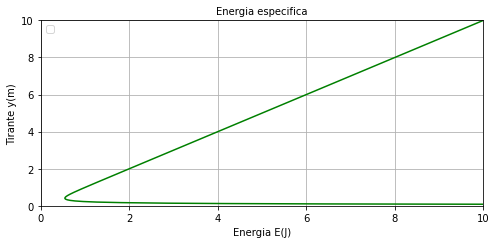

In [ ]:
'Q es el caudal'
'S es la pendiente'
'y es el tirante (m)'
'b base del canal (m)'  
'k es el talúd'
'A Área hidráulica'
'P perímetro mojado'
'T Ancho superficie Libre'
Q=input('ingrese el valor del Caudal:')
b=input("ingrese el valor de la Base del Canal en metros:")
k1=input("ingrese el valor del primer Talúd:")
k2=input("ingrese el valor del segundo Talúd:")
alp=input("ingrese el valor del coeficiente de Coriolis:")

if isfloat(Q) and isfloat(b) and isfloat(k1) and isfloat(k2) and isfloat(alp):
  g=9.806665
  Q=float(Q)
  b=float(b)
  k1=float(k1)
  k2=float(k2)
  alp=float(alp)

  'Ecuaciones Simbólicas'
  y1=sp.Symbol('y1')
  Al=b*y1+((k1+k2)/2)*y1**2
  Tl=b+y1*(k1+k2)
  fyc=g*(Al**3/Tl)-Q**2
  diffyc=sp.diff(fyc,y1)
  
  yc=float(newton(fyc,diffyc,b))

  'Ecuaciones numéricas'
  A=b*yc+((k1+k2)/2)*yc**2
  P=b+yc*(np.sqrt(1+k1**2)+np.sqrt(1+k2**2))
  T=b+yc*(k1+k2)
  Rh=A/P
  v=np.sqrt(A*g/T)
  V=Q/A
  Ecri=yc+alp*(Q**2/(2*g*A**2))
  Fr=V/(g*A/T)**0.5
  print('El valor del Tirante crítico es de %0.4f' % yc)
  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('Ancho de Superficie Libre %0.04f' % T)
  print('Radio Hidráulico %0.04f' % Rh)
  print('La velocidad crítica es de %0.4f' % v)
  print('El valor de la Energía Crítica es de %0.4f' % Ecri)
  print('El número de Froude es de %0.4f' % Fr)

  Inter1=np.arange(0.001,yc,0.01)
  Inter2=np.arange(yc,10,0.01)
  Inter2=np.delete(Inter2,0)
  InterTC=np.append(Inter1,Inter2)
  A=b*InterTC+((k1+k2)/2)*InterTC**2
  A1=b*yc+((k1+k2)/2)*yc**2
  XE=InterTC+alp*(Q**2/(2*g*A**2)) 
  #XE1=yc+alp*(Q**2/(2*g*A1**2)) 
  plt.plot(XE,InterTC,'g')
  #plt.plot(XE1, yc,'o',label='Tirante Crítico')
  plt.xlim(0,10)
  plt.ylim(0,10)
  plt.title('Energia especifica',fontsize=10)
  plt.xlabel("Energia E(J)") 
  plt.ylabel("Tirante y(m)")  
  plt.legend()
  plt.grid()
  plt.show()

else:
  print('Alguno de los valores que ingreso no es númerico')

## Sección Circular

ingrese el valor del Diametro en metros:0.4
ingrese el valor del Caudal:0.145
ingrese el valor del coeficiente de Coriolis:1
El valor del Tirante crítico es de 0.2762
El perímetro Mojado es de 0.7847
Área Hidráulica 0.0926
Ancho de Superficie Libre 0.3698
Radio Hidráulico 0.1180
La velocidad crítica es de 1.5666
El valor de la Energía Crítica es de 0.4013
El número de Froude es de 1.0000


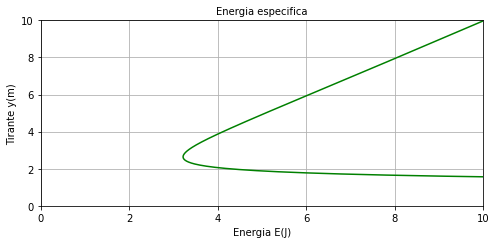

In [ ]:
D=input("ingrese el valor del Diametro en metros:")
Q=input('ingrese el valor del Caudal:')
alp=input("ingrese el valor del coeficiente de Coriolis:")

if isfloat(D) and isfloat(Q) and isfloat(alp):
  D=float(D)
  Q=float(Q)
  alp=float(alp)
  g=9.806665
  r=D/2
  yi=math.pi-0.01
  yf=yi+0.01
  error=0.000000001
  cont=1
  if Q>r:
    yi=math.pi*1.95-0.01
    yf=math.pi*1.95
  while abs(yi-yf)>error:
    yi=yf
    area=D**2*(yi-math.sin(yi))/8
    T=D*math.sin(yi/2)
    fy=g*(area**3/T)-Q**2
    par1=g*D**5*(yi-math.sin(yi))**2
    par2=(6*math.sin(yi/2)*(1-math.cos(yi))-math.cos(yi/2)*(yi-math.sin(yi)))
    dfy=(par1*par2)/(1024*(math.sin(yi/2))**2)
    yf=yi-fy/dfy
    cont+= 1
    if cont > 40 or area > (math.pi*D**2/4):
      break
  if area<(math.pi*D**2/4):
    
    h=D*(1-math.cos(yf/2))/2
    A=D**2*(yi-math.sin(yi))/8
    P=yi*D/2
    T=D*math.sin(yf/2)
    Rh=A/P
    y=-D/2*(math.cos(yf/2)-1)
    v=np.sqrt(A*g/T)
    V=Q/A
    Ecri=y+alp*(Q**2/(2*g*A**2))
    Fr=V/(g*A/T)**0.5
    print('El valor del Tirante crítico es de %0.4f' % y)
    print('El perímetro Mojado es de %0.04f' % P)
    print('Área Hidráulica %0.4f' % A)
    print('Ancho de Superficie Libre %0.04f' % T)
    print('Radio Hidráulico %0.04f' % Rh)
    print('La velocidad crítica es de %0.4f' % v)
    print('El valor de la Energía Crítica es de %0.4f' % Ecri)
    print('El número de Froude es de %0.4f' % Fr)

    Inter1=np.arange(0.001,y,0.01)
    Inter2=np.arange(y,10,0.01)
    Inter2=np.delete(Inter2,0)
    InterTC=np.append(Inter1,Inter2)
    A=D**2*(InterTC-np.sin(InterTC))/8
    XE=InterTC+alp*(Q**2/(2*g*A**2)) 
    plt.plot(XE,InterTC,'g')
    plt.xlim(0,10)
    plt.ylim(0,10)
    plt.title('Energia especifica',fontsize=10)
    plt.xlabel("Energia E(J)") 
    plt.ylabel("Tirante y(m)")  
    plt.grid()
    plt.show()
  else:
    print('Error')
else:
  print('Alguno de los valores que ingreso no es númerico')

## Sección Triangular

ingrese el valor del Talúd:2
ingrese el valor del Caudal:3
ingrese el valor del coeficiente de Coriolis:1
Solución encontrada después 7 iteraciones.
El valor del Tirante Crítico es de 0.8557
El perímetro Mojado es de 3.8269
Área Hidráulica 1.4645
Radio Hidráulico 0.3827
Ancho Superficial 3.4229
La velocidad Crítica es de 2.0484
El valor de la Energía Crítica es de 1.0697
El número de Froude es de 1.0000


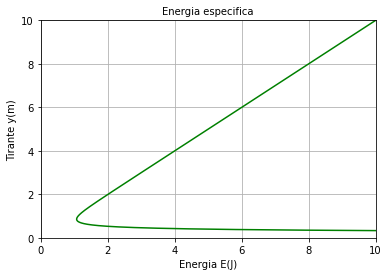

In [ ]:
'y es el tirante (m)' 
'k es el talúd'


k=input("ingrese el valor del Talúd:")
Q=input('ingrese el valor del Caudal:')
alp=input("ingrese el valor del coeficiente de Coriolis:")

if isfloat(k) and isfloat(Q) and isfloat(alp):
  Q=float(Q)
  k=float(k) #condición inicial
  alp=float(alp)
  g=9.807
  'Ecuaciones Simbólicas'
  y1=sp.Symbol('y1')
  Al=k*y1**2
  Tl=2*k*y1
  fyc=g*(Al**3/Tl)-Q**2
  diffyc=sp.diff(fyc,y1)
  yc=float(newton(fyc,diffyc,k))

  'Ecuaciones númericas'
  A=k*yc**2
  P=2*yc*np.sqrt(1+k**2)
  Rh=(k*yc)/(2*np.sqrt(1+k**2))
  T=2*k*yc
  D=1/(2*yc)
  v=np.sqrt(A*g/T)
  V=Q/A
  Ecri=yc+alp*(Q**2/(2*g*A**2))
  Fr=V/(g*A/T)**0.5 

  print('El valor del Tirante Crítico es de %0.4f' % yc)
  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('Radio Hidráulico %0.04f' % Rh)
  print('Ancho Superficial %0.4f' % T)
  print('La velocidad Crítica es de %0.4f' % v)
  print('El valor de la Energía Crítica es de %0.4f' % Ecri)
  print('El número de Froude es de %0.4f' % Fr)

  Inter1=np.arange(0.001,yc,0.01)
  Inter2=np.arange(yc,10,0.01)
  Inter2=np.delete(Inter2,0)
  InterTC=np.append(Inter1,Inter2)
  A=k*InterTC**2
  XE=InterTC+alp*(Q**2/(2*g*A**2)) 
  plt.plot(XE,InterTC,'g')
  plt.xlim(0,10)
  plt.ylim(0,10)
  plt.title('Energia especifica',fontsize=10)
  plt.xlabel("Energia E(J)") 
  plt.ylabel("Tirante y(m)")  
  plt.grid()
  plt.show()
else:
  print('Lo que ingreso no es un valor numérico')

## Sección Parabólica

ingrese el valor del Ancho superficie Libre:1
ingrese el valor del Caudal:1.5
ingrese el valor del coeficiente de Coriolis:1
El valor del Tirante Crítico es de 0.9185
El perímetro Mojado es de 1.0290
Área Hidráulica 0.6124
El valor de la constante parabólica 3.6742
Radio Hidráulico 0.5951
La velocidad crítica es de 2.4506
El valor de la Energía Específica es de 1.2247
El número de Froude es de 1.0000


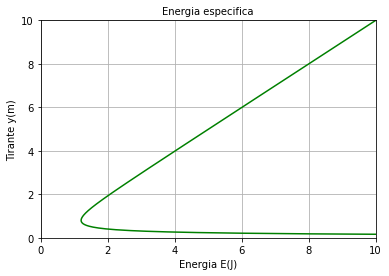

In [ ]:
'T Ancho superficie Libre'

T=input("ingrese el valor del Ancho superficie Libre:")
Q=input('ingrese el valor del Caudal:')
alp=input("ingrese el valor del coeficiente de Coriolis:")

if isfloat(T) and isfloat(Q) and isfloat(alp):
  g=9.806665
  T=float(T)
  Q=float(Q)
  alp=float(alp)
  yi = 1
  yf = 2
  error = 0.000000001
  cont = 1
  while abs(yi-yf)>error:
    yi = yf
    area = 2*T*yi/3
    d_area = 2*T/3
    perimeter = 0
    d_perimeter = 0
    if yi/T<=0.25:
      perimeter = T+8*yi**2/(3*T)
      d_perimeter = 16*yi/(3*T)
    elif yi/T > 0.25:
      x = 4*yi/T
      dx = 4/T
      perimeter = 0.5*T*((1+x**2)**0.5+math.log(x+(1+x**2)**0.5)/x)
      d_perimeter = 0.5*T*(x/(1+x**2)**0.5+1/(x*(1+x**2)**0.5)-math.log(x+(1+x**2)**0.5)/x**2)*dx
      fy = area**(5/3)/perimeter**(2/3)
      dfy = 5*area**(2/3)/perimeter**(2/3)*d_area/3-2*area**(5/3)/perimeter**(5/3)*d_perimeter/3
      yf = yi-fy/dfy
      cont += 1
      if cont > 40:
        break
    #A = 2*T*yf/3
    P = 0
    if yi/T<=0.25:
      P =T+8*yf**2/(3*T)
    elif yi/T>0.25:
      x = 4*yf/T
      P = 0.5*T*((1+x**2)**0.5+math.log(x+(1+x**2)**0.5)/x)

  E=(Q/1.1067)**(2/3)
  yc=3/4*E
  A=2*T*yc/3
  Rh=A/P
  k=(4*yc)/T**2
  Vc=np.sqrt(2/3*g*yc)
  Fr=Vc/(g*A/T)**0.5
  print('El valor del Tirante Crítico es de %0.4f' % yc)
  print('El perímetro Mojado es de %0.04f' % P)
  print('Área Hidráulica %0.4f' % A)
  print('El valor de la constante parabólica %0.4f' % k)
  print('Radio Hidráulico %0.04f' % Rh)
  print('La velocidad crítica es de %0.4f' % Vc)
  print('El valor de la Energía Específica es de %0.4f' % E)
  print('El número de Froude es de %0.4f' % Fr)

  Inter1=np.arange(0.001,yc,0.01)
  Inter2=np.arange(yc,10,0.01)
  Inter2=np.delete(Inter2,0)
  InterTC=np.append(Inter1,Inter2)
  A=2*T*InterTC/3
  XE=InterTC+alp*(Q**2/(2*g*A**2)) 
  plt.plot(XE,InterTC,'g')
  plt.xlim(0,10)
  plt.ylim(0,10)
  plt.title('Energia especifica',fontsize=10)
  plt.xlabel("Energia E(J)") 
  plt.ylabel("Tirante y(m)")  
  plt.grid()
  plt.show()
else:
  print('Alguno de los valores que ingreso no es númerico')

# Estructuras de Control-Vertederos


## Sección Rectangular

In [ ]:
b=input('Base del vertedor:')
B=input("Base del Canal:")
h=input("Carga del vertedor:")
w=input("Altura del vertedor:")
theta=input("inclinación del vertedor:")

if isfloat(b) and isfloat(B) and isfloat(h) and isfloat(w) and isfloat(theta):
  g=9.806665
  b=float(b)
  B=float(B)
  h=float(h)
  w=float(w)
  theta=float(theta)

  if 0.1<=h<=0.6 and 0.5<=b<=2 and 0.2<=w<=1.13 and B>b:
    mu=(0.6075-0.045*((B-b)/B)+0.0041/h)*(1+0.55*(b/B)**2*(h/(h+w))**2)
  else:
    print('El valor que ingreso no satisface las condiciones dadas o B<b')
  
  Co=1.1951-0.3902*(theta/180)
  mu1=mu*Co
  Q=2/3*np.sqrt(2*g)*mu1*b*h**(3/2)

  print('El valor del coeficiente de gasto es %0.4f' % mu)
  print('El valor del Caudal es %0.4f' % Q)

else:
  print('Alguno de los valores que ingreso no es númerico')

Base del vertedor:2
Base del Canal:7
Carga del vertedor:0.26
Altura del vertedor:1
inclinación del vertedor:90
El valor del coeficiente de gasto es 0.5923
El valor del Caudal es 0.4636


## Sección Triangular

In [ ]:
h=input("Carga del vertedor:")
w=input("Altura del vertedor:")
theta=input("inclinación del vertedor:")

if isfloat(h) and isfloat(w) and isfloat(theta):
  g=9.806665
  h=float(h)
  w=float(w)
  theta=float(theta)

  Co=1.32*(np.tan(theta/2))/h**0.03

  Q=Co*h**(5/2)

  print('El valor del coeficiente de gasto (C) es %0.4f' % Co)
  print('El valor del Caudal es %0.4f' % Q)

else:
  print('Alguno de los valores que ingreso no es númerico')

Carga del vertedor:0.26
Altura del vertedor:1
inclinación del vertedor:45
El valor del coeficiente de gasto (C) es 0.7667
El valor del Caudal es 0.0264


## Sección Trapecial

In [ ]:
b=input('Base del vertedor:')
B=input("Base del Canal:")
h=input("Carga del vertedor:")
w=input("Altura del vertedor:")
theta=input("inclinación del vertedor:")

if isfloat(b) and isfloat(B) and isfloat(h) and isfloat(w) and isfloat(theta):
  g=9.806665
  b=float(b)
  B=float(B)
  h=float(h)
  w=float(w)
  theta=float(theta)

  if 0.1<=h<=0.6 and 0.5<=b<=2 and 0.2<=w<=1.13 and B>b:
    mu=(0.6075-0.045*((B-b)/B)+0.0041/h)*(1+0.55*(b/B)**2*(h/(h+w))**2)
  else:
    print('El valor que ingreso no satisface las condiciones dadas o B<b')
  
  CoT=1.32*(np.tan(theta/2))/h**0.03
  Q=CoT*h**(5/2)+2/3*np.sqrt(2*g)*mu*b*h**(3/2)

  print('El valor del coeficiente de gasto es %0.4f' % mu)
  print('El valor del coeficiente de gasto (C) es %0.4f' % CoT)
  print('El valor del Caudal es %0.4f' % Q)

else:
  print('Alguno de los valores que ingreso no es númerico')

Base del vertedor:2
Base del Canal:7
Carga del vertedor:0.26
Altura del vertedor:1
inclinación del vertedor:45
El valor del coeficiente de gasto es 0.5923
El valor del coeficiente de gasto (C) es 0.7667
El valor del Caudal es 0.4901


## Sección Circular

In [ ]:
D=input("Diametro del vertedor:")
h=input("Carga del vertedor:")


if isfloat(h) and isfloat(D):
  g=9.806665
  h=float(h)
  D=float(D)

  phi=10.12*(h/D)**1.975-2.66*(h/D)**3.78
  mu=0.555+D/(110*h)+(0.041*h)/D
  Q=phi*mu*D**(5/2)

  print('El valor del coeficiente de gasto (phi) es %0.4f' % phi)
  print('El valor del coeficiente de gasto (mu) es %0.4f' % mu)
  print('El valor del Caudal es %0.4f' % Q)

else:
  print('Alguno de los valores que ingreso no es númerico')

Diametro del vertedor:1
Carga del vertedor:0.26
El valor del coeficiente de gasto (phi) es 0.6912
El valor del coeficiente de gasto (mu) es 0.6006
El valor del Caudal es 0.4151


# Estructuras de Control- Orificios


In [5]:
A=input('Área del orificio:')
h=input("Carga sobre el orificio:")
Cd=input("Coeficiente de descarga:")

if isfloat(A) and isfloat(h) and isfloat(Cd):
  g=9.806665
  A=float(A)
  h=float(h)
  Cd=float(Cd)

  Q=Cd*A*np.sqrt(2*g*h)
  print('El valor del Caudal (m3/s) es %0.4f' % Q)
  print('El valor del Caudal (l/s) es %0.4f' % (Q*1000))

else:
  print('Alguno de los valores que ingreso no es númerico')

Área del orificio:1
Carga sobre el orificio:1
Coeficiente de descarga:.60
El valor del Caudal (m3/s) es 2.6572
El valor del Caudal (l/s) es 2657.2164


# Estructuras de Control- Compuerta Plana

In [ ]:
b=input('Base del canal:')
a=input("Apertura de la compuerta:")
y1=input("Tirante antes de la compuerta:")
y3=input("Tirante después de la compuerta:")

if isfloat(b) and isfloat(a) and isfloat(y1) and isfloat(y3):
  g=9.806665
  b=float(b)
  a=float(a)
  y1=float(y1)
  y3=float(y3)
  if y3<y1:
    Cc=0.510+0.1*np.sqrt(23.04-(-4.69)**2)
    Cd=Cc/(np.sqrt(1+Cc*a/y1))
    Cv=Cd/Cc
    Q=Cd*b*a*np.sqrt(2*g*y1)
  
    print('El valor del coeficiente de descarga (Cd) es %0.4f' % Cd)
    print('El valor del coeficiente de contracción (Cc) es %0.4f' % Cc)
    print('El valor del coeficiente de velocidad (Cv) es %0.4f' % Cv)
    print('El valor del Caudal es %0.4f' % Q)

  else:
    print('El valor del tirante y3 no puede ser mayor que el tirante y1')
else:
  print('Alguno de los valores que ingreso no es númerico')

Base del canal:2
Apertura de la compuerta:3
Tirante antes de la compuerta:4
Tirante después de la compuerta:3
El valor del coeficiente de descarga (Cd) es 0.5068
El valor del coeficiente de contracción (Cc) es 0.6122
El valor del coeficiente de velocidad (Cv) es 0.8279
El valor del Caudal es 26.9329
